<a href="https://colab.research.google.com/github/arafatro/IntroToDS/blob/main/06_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Wine Quality dataset

#### Agenda
- Loading the dataset
- Data wrangling for missing variables.
- Data transformation.
- Data visualization

# Cell 1: Import Libraries

In [72]:
# Import necessary libraries and suppress warnings
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import random

# For sparse matrices and nearest neighbors (if needed later)
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")


# Cell 2: Load the Wine Quality Datasets

In [73]:
# Load the red and white wine datasets from UCI repository
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

# Display the first few rows to verify data loading
print("Red Wine Dataset (first 5 rows):")
display(df_red.head())

print("White Wine Dataset (first 5 rows):")
display(df_white.head())


Red Wine Dataset (first 5 rows):


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

White Wine Dataset (first 5 rows):


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

# Cell 3: Data Overview and Statistics

In [74]:
# Overview of red wine dataset
print("Data types in Red Wine Dataset:")
print(df_red.dtypes)

Data types in Red Wine Dataset:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [75]:
print("Sample rows from Red Wine Dataset:")
display(df_red.iloc[100:110])

Sample rows from Red Wine Dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
100            8.3             0.610         0.30             2.1      0.084   
101            7.8             0.500         0.30             1.9      0.075   
102            8.1             0.545         0.18             1.9      0.080   
103            8.1             0.575         0.22             2.1      0.077   
104            7.2             0.490         0.24             2.2      0.070   
105            8.1             0.575         0.22             2.1      0.077   
106            7.8             0.410         0.68             1.7      0.467   
107            6.2             0.630         0.31             1.7      0.088   
108            8.0             0.330         0.53             2.5      0.091   
109            8.1             0.785         0.52             2.0      0.122   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
100                 11.0                  50.0   0.9972  3.40       0.61   
101                  8.0                  22.0   0.9959  3.31       0.56   
102                 13.0                  35.0   0.9972  3.30       0.59   
103                 12.0                  65.0   0.9967  3.29       0.51   
104                  5.0                  36.0   0.9960  3.33       0.48   
105                 12.0                  65.0   0.9967  3.29       0.51   
106                 18.0                  69.0   0.9973  3.08       1.31   
107                 15.0                  64.0   0.9969  3.46       0.79   
108                 18.0                  80.0   0.9976  3.37       0.80   
109                 37.0                 153.0   0.9969  3.21       0.69   

     alcohol  quality  
100     10.2        6  
101     10.4        6  
102      9.0        6  
103      9.2        5  
104      9.4        5  
105      9.2        5  
106      9.3        5  
107      9.3        5  
108      9.6        6  
109      9.3        5

In [76]:
print("Descriptive statistics for Red Wine Dataset:")
display(df_red.describe())

Descriptive statistics for Red Wine Dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [77]:
print("Information about Red Wine Dataset:")
df_red.info()

Information about Red Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Cell 4: Visual Analysis of Red Wine

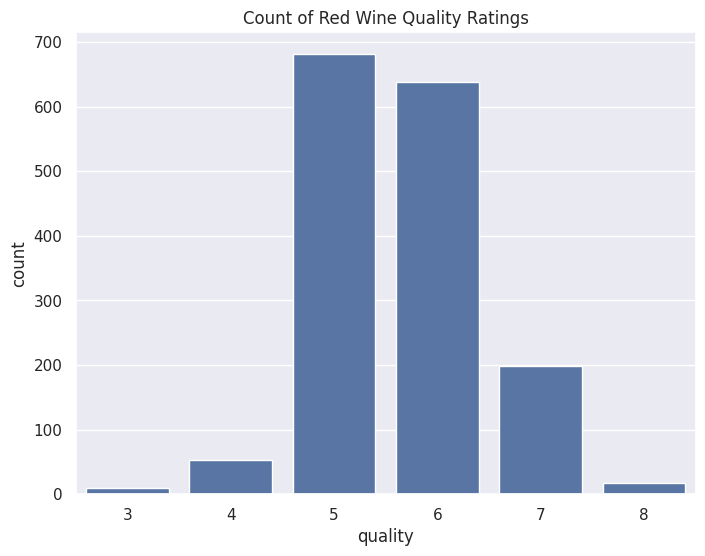

In [78]:
# Analysis of Red Wine using seaborn plots

# Set figure size for all seaborn plots
sns.set(rc={'figure.figsize': (8, 6)})

# Count plot for quality
plt.figure()
sns.countplot(x=df_red['quality'])
plt.title("Count of Red Wine Quality Ratings")
plt.show()

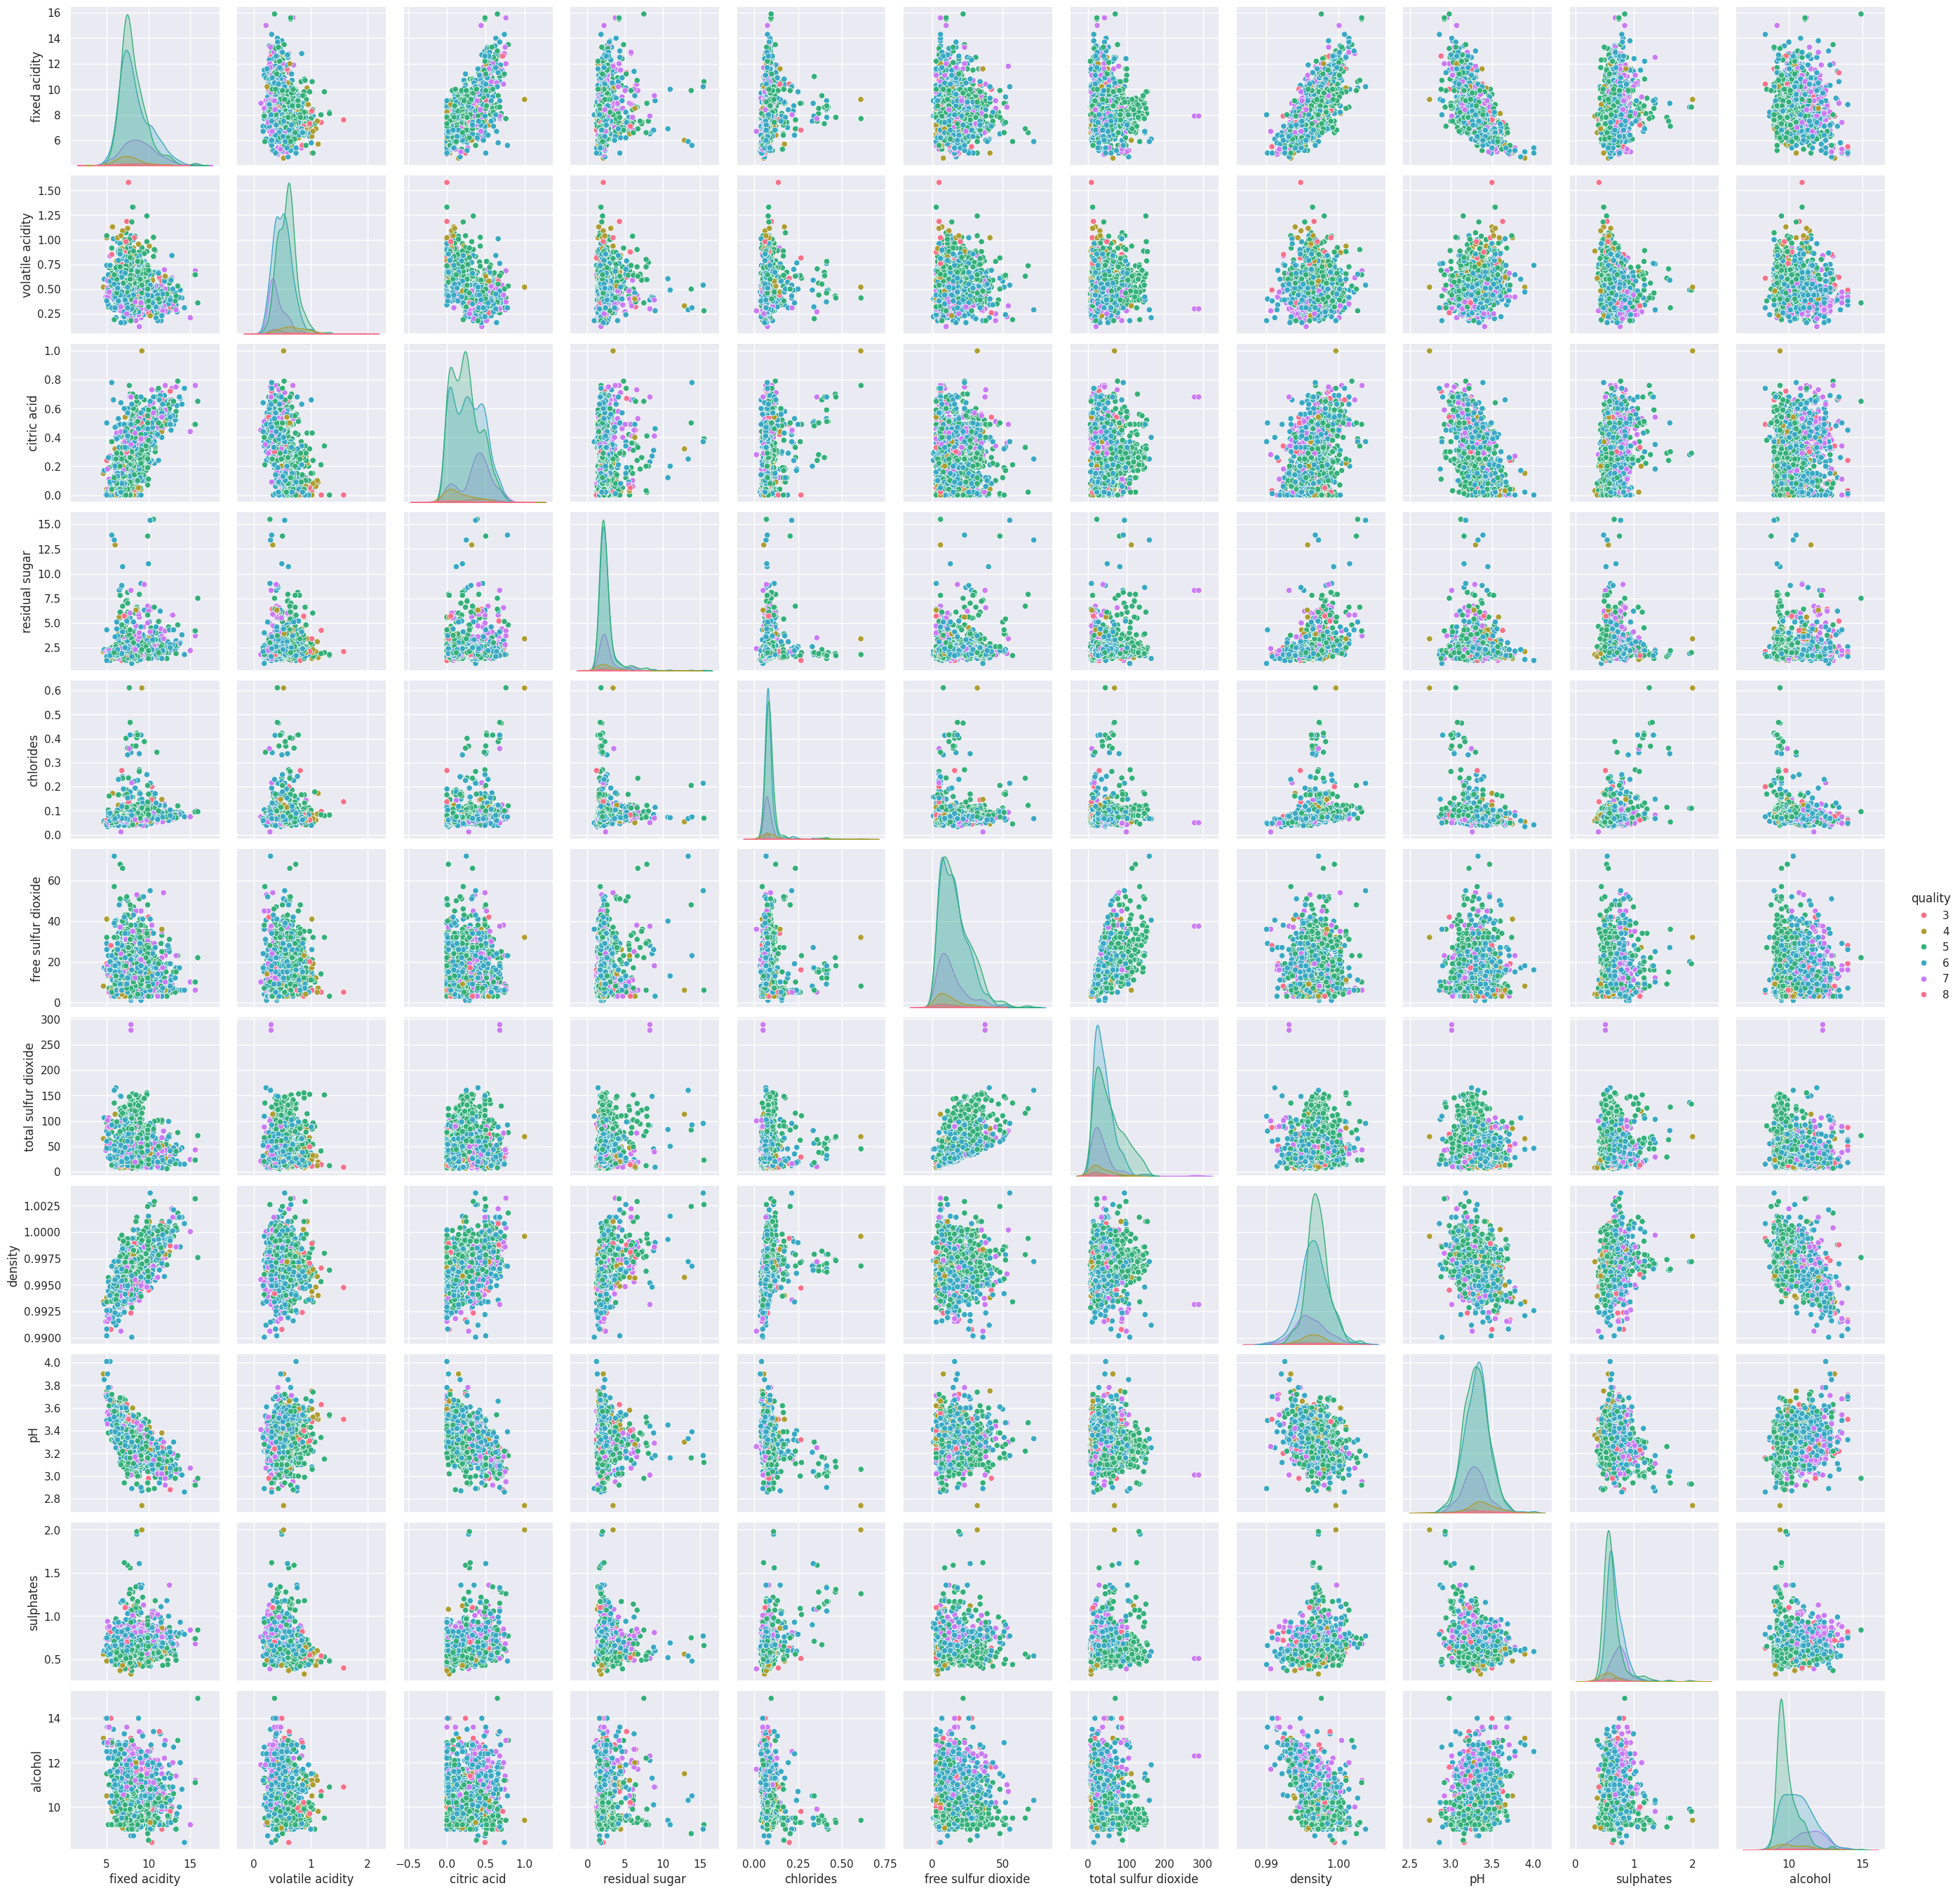

In [79]:
# Pairplot for exploring relationships
sns.pairplot(df_red, hue="quality", palette="husl")
plt.show()


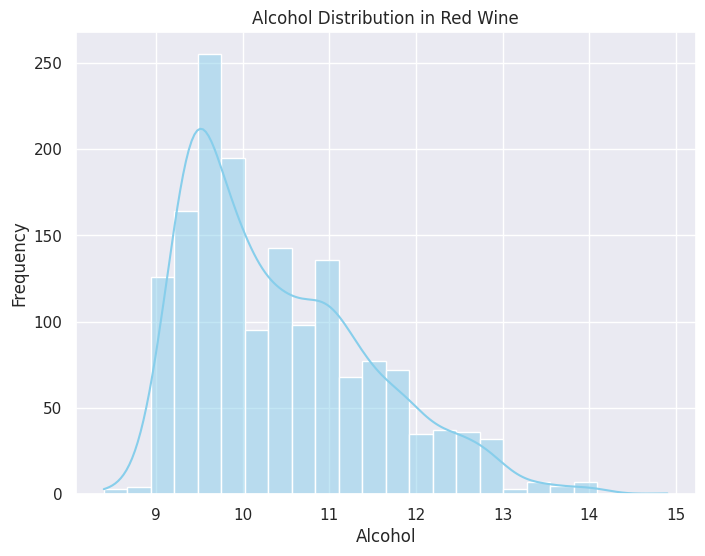

In [80]:
# Distribution plot for alcohol
plt.figure()
sns.histplot(df_red['alcohol'], kde=True, color='skyblue')
plt.title("Alcohol Distribution in Red Wine")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

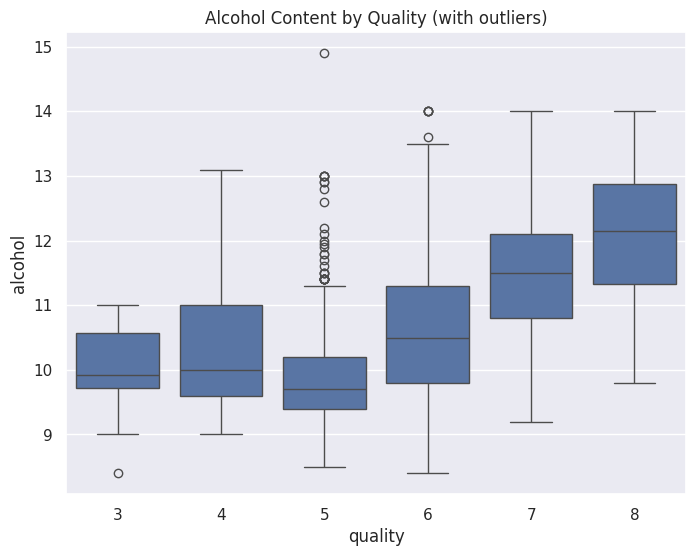

In [81]:
# Boxplot for alcohol by quality, with and without outliers
plt.figure()
sns.boxplot(x='quality', y='alcohol', data=df_red)
plt.title("Alcohol Content by Quality (with outliers)")
plt.show()

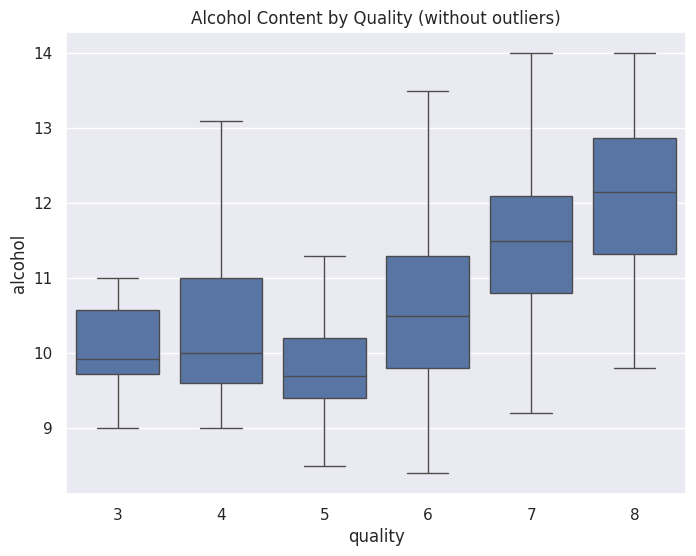

In [82]:
plt.figure()
sns.boxplot(x='quality', y='alcohol', data=df_red, showfliers=False)
plt.title("Alcohol Content by Quality (without outliers)")
plt.show()

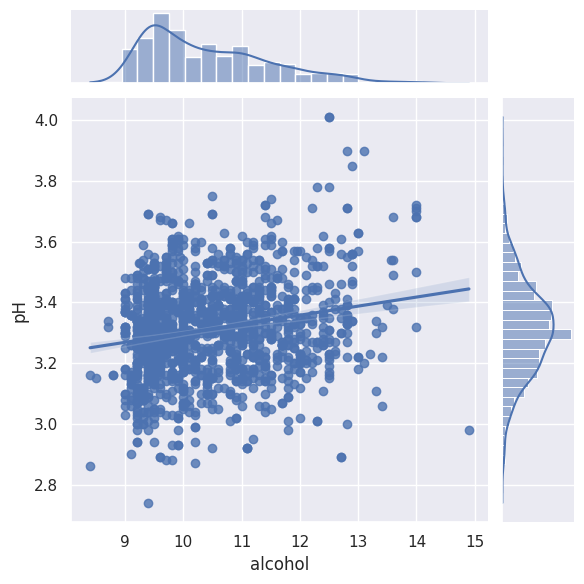

In [83]:
# Jointplot for alcohol vs. pH
sns.jointplot(x='alcohol', y='pH', data=df_red, kind='reg')
plt.show()

In [84]:
# Calculate skewness of alcohol distribution
from scipy.stats import skew
print("Skewness of alcohol distribution:", skew(df_red['alcohol']))

Skewness of alcohol distribution: 0.8600210646566755


In [85]:
# Pearson correlation between alcohol and pH
from scipy.stats import pearsonr
def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print(f"Correlation between {column1} and {column2} is {pearson_corr:.2f}")
  print(f"P-value: {p_value:.4f}")

get_correlation('alcohol', 'pH', df_red)

Correlation between alcohol and pH is 0.21
P-value: 0.0000


# Cell 5: Analysis of White Wine

In [86]:
# Descriptive statistics for white wine
print("Descriptive statistics for White Wine Dataset:")
display(df_white.describe())

Descriptive statistics for White Wine Dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [87]:
# Compare quality means between red and white wines
print("White wine quality mean =", df_white["quality"].mean())
print("Red wine quality mean =", df_red["quality"].mean())

White wine quality mean = 5.87790935075541
Red wine quality mean = 5.6360225140712945


In [88]:
# Create a DataFrame comparing quality means
d = {'color': ['red', 'white'], 'mean_quality': [df_red["quality"].mean(), df_white["quality"].mean()]}
df_mean = pd.DataFrame(data=d)
print("Mean quality comparison:")
display(df_mean)

Mean quality comparison:


color  mean_quality
0    red      5.636023
1  white      5.877909

# Cell 6: Add Wine Category and Create Quality Labels

In [89]:
# Add a new attribute for wine category
df_white['wine_category'] = 'white'
df_red['wine_category'] = 'red'

print('RED WINE: Unique quality ratings:', sorted(df_red['quality'].unique()))
print('WHITE WINE: Unique quality ratings:', sorted(df_white['quality'].unique()))


RED WINE: Unique quality ratings: [3, 4, 5, 6, 7, 8]
WHITE WINE: Unique quality ratings: [3, 4, 5, 6, 7, 8, 9]


In [90]:
# Convert quality into categorical labels
df_red['quality_label'] = df_red['quality'].apply(lambda value: 'low' if value <= 5 else ('medium' if value <= 7 else 'high'))
df_red['quality_label'] = pd.Categorical(df_red['quality_label'], categories=['low', 'medium', 'high'])

df_white['quality_label'] = df_white['quality'].apply(lambda value: 'low' if value <= 5 else ('medium' if value <= 7 else 'high'))
df_white['quality_label'] = pd.Categorical(df_white['quality_label'], categories=['low', 'medium', 'high'])

print("White wine quality label counts:")
display(df_white['quality_label'].value_counts())

print("Red wine quality label counts:")
display(df_red['quality_label'].value_counts())

White wine quality label counts:


quality_label
medium    3078
low       1640
high       180
Name: count, dtype: int64

Red wine quality label counts:


quality_label
medium    837
low       744
high       18
Name: count, dtype: int64

In [91]:
# Combine the two datasets
df_wines = pd.concat([df_red, df_white])

# Re-shuffle records to randomize data points
df_wines = df_wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
display(df_wines.head(10))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   
5            7.2              0.53         0.14             2.1      0.064   
6            7.5              0.27         0.31            17.7      0.051   
7            6.8              0.11         0.27             8.6      0.044   
8            9.0              0.44         0.49             2.4      0.078   
9            7.1              0.23         0.30             2.6      0.034   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   
5                 15.0                  29.0  0.99323  3.35       0.61   
6                 33.0                 173.0  0.99900  3.09       0.64   
7                 45.0                 104.0  0.99454  3.20       0.37   
8                 26.0                 121.0  0.99780  3.23       0.58   
9                 62.0                 148.0  0.99121  3.03       0.56   

   alcohol  quality wine_category quality_label  
0     12.2        8         white          high  
1      9.9        5           red           low  
2     12.0        7         white        medium  
3      9.5        6         white        medium  
4      8.9        6         white        medium  
5     12.1        6           red        medium  
6     10.2        5         white           low  
7      9.9        6         white        medium  
8      9.2        5           red           low  
9     11.3        7         white        medium

# Cell 7: Descriptive Statistics by Wine Quality Category

In [92]:
# Analyze a subset of attributes based on quality labels
subset_attr = ['alcohol', 'density', 'pH', 'quality']

low = round(df_wines[df_wines['quality_label'] == 'low'][subset_attr].describe(), 2)
medium = round(df_wines[df_wines['quality_label'] == 'medium'][subset_attr].describe(), 2)
high = round(df_wines[df_wines['quality_label'] == 'high'][subset_attr].describe(), 2)

# Concatenate summary statistics for comparison
quality_summary = pd.concat([low, medium, high], axis=1,
          keys=['👎 Low Quality Wine', '👌 Medium Quality Wine', '👍 High Quality Wine'])
display(quality_summary)


👎 Low Quality Wine                            👌 Medium Quality Wine  \
                 alcohol  density       pH  quality               alcohol   
count            2384.00  2384.00  2384.00  2384.00               3915.00   
mean                9.87     1.00     3.21     4.88                 10.81   
std                 0.84     0.00     0.16     0.36                  1.20   
min                 8.00     0.99     2.74     3.00                  8.40   
25%                 9.30     0.99     3.11     5.00                  9.80   
50%                 9.60     1.00     3.20     5.00                 10.80   
75%                10.40     1.00     3.31     5.00                 11.70   
max                14.90     1.00     3.90     5.00                 14.20   

                                 👍 High Quality Wine                          
       density       pH  quality             alcohol density      pH quality  
count  3915.00  3915.00  3915.00              198.00  198.00  198.00  198.00  
mean      0.99     3.22     6.28               11.69    0.99    3.23    8.03  
std       0.00     0.16     0.45                1.27    0.00    0.16    0.16  
min       0.99     2.72     6.00                8.50    0.99    2.88    8.00  
25%       0.99     3.11     6.00               11.00    0.99    3.13    8.00  
50%       0.99     3.21     6.00               12.00    0.99    3.23    8.00  
75%       1.00     3.33     7.00               12.60    0.99    3.33    8.00  
max       1.04     4.01     7.00               14.00    1.00    3.72    9.00

#Cell 8: Histogram and Heatmap Visualization

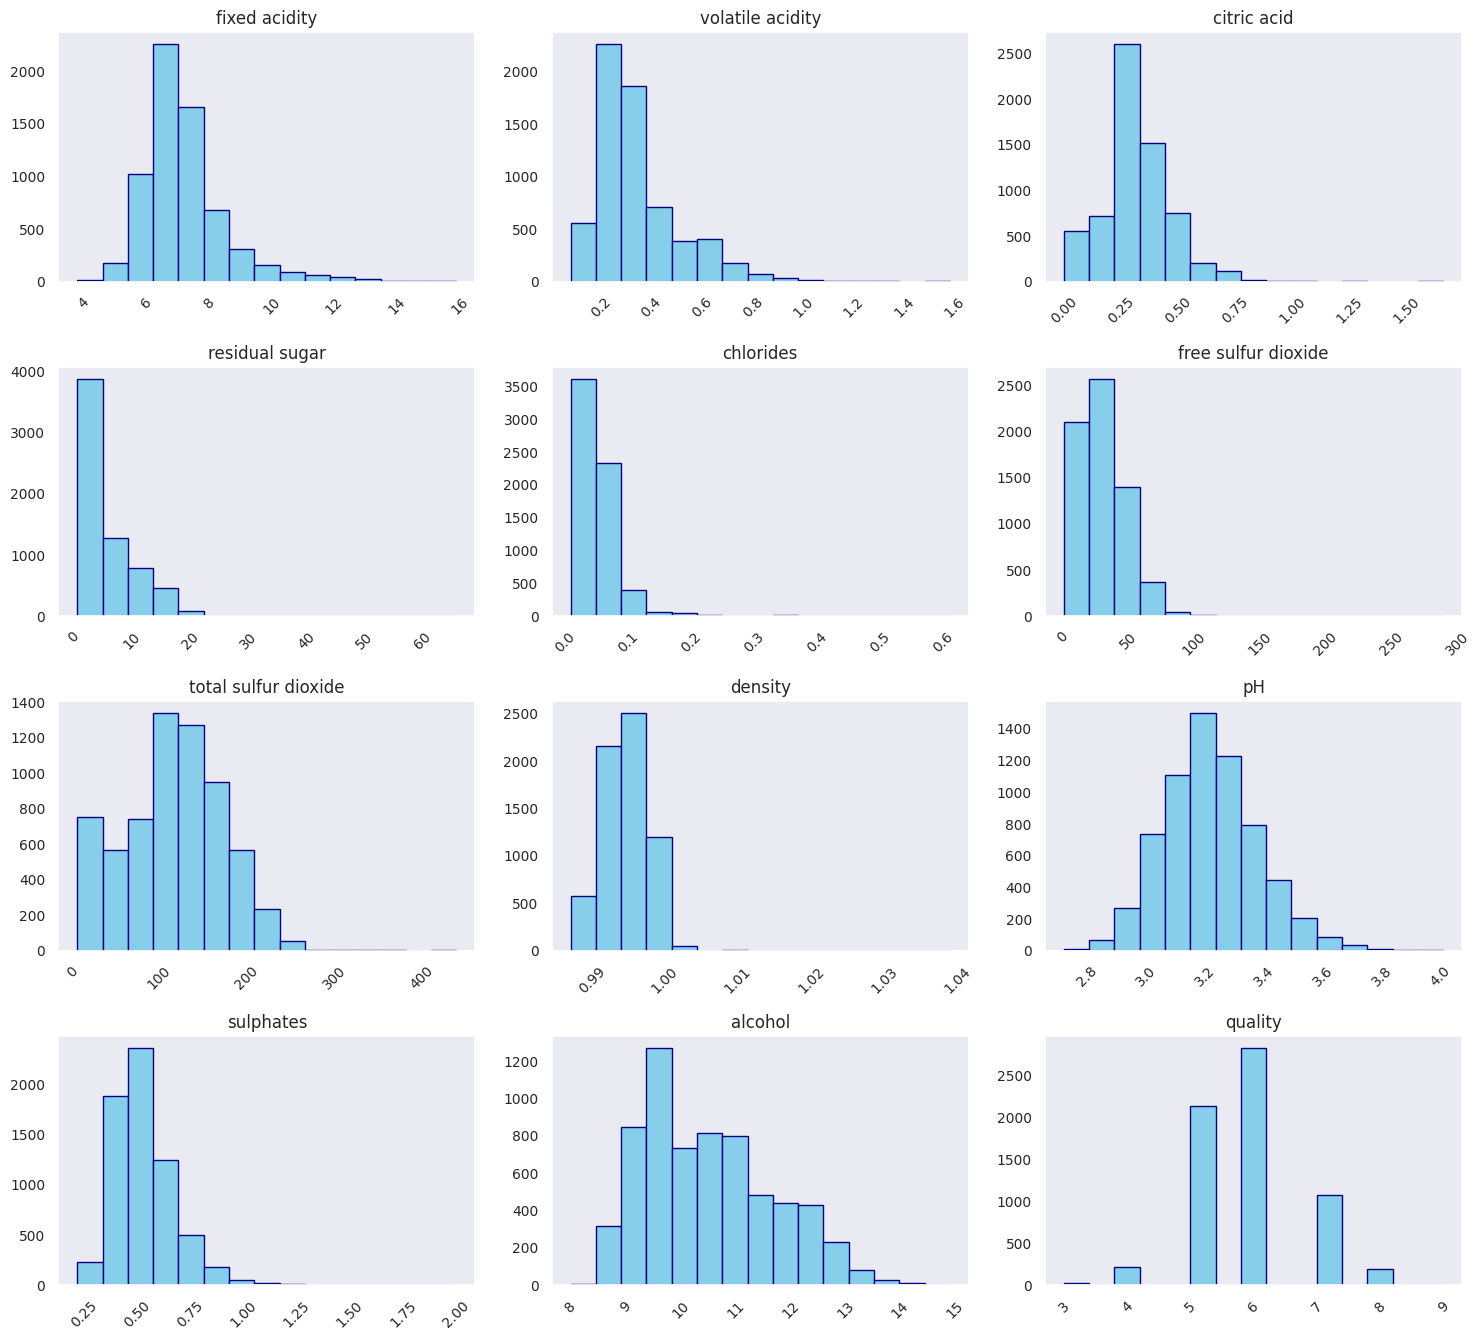

In [93]:
# Plot histograms for all attributes in the combined dataset with different colors
fig = df_wines.hist(bins=15, color='skyblue', edgecolor='navy',
                    linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
plt.show()


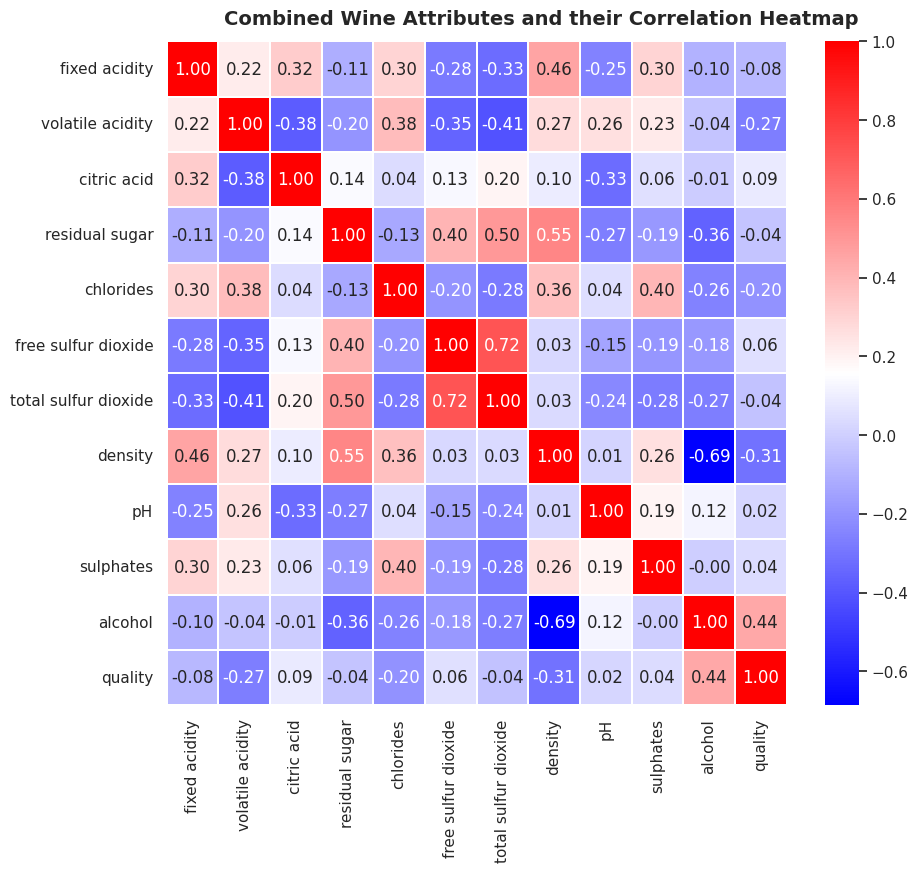

In [94]:
# Combined correlation heatmap for wines
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# Select only numeric columns for the correlation matrix
numeric_df = df_wines.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), ax=ax, cmap="bwr", annot=True, fmt='.2f', linewidths=0.05)
fig.subplots_adjust(top=0.94)
fig.suptitle('Combined Wine Attributes and their Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()


#Cell 9: Count Plot and 3D Visualization

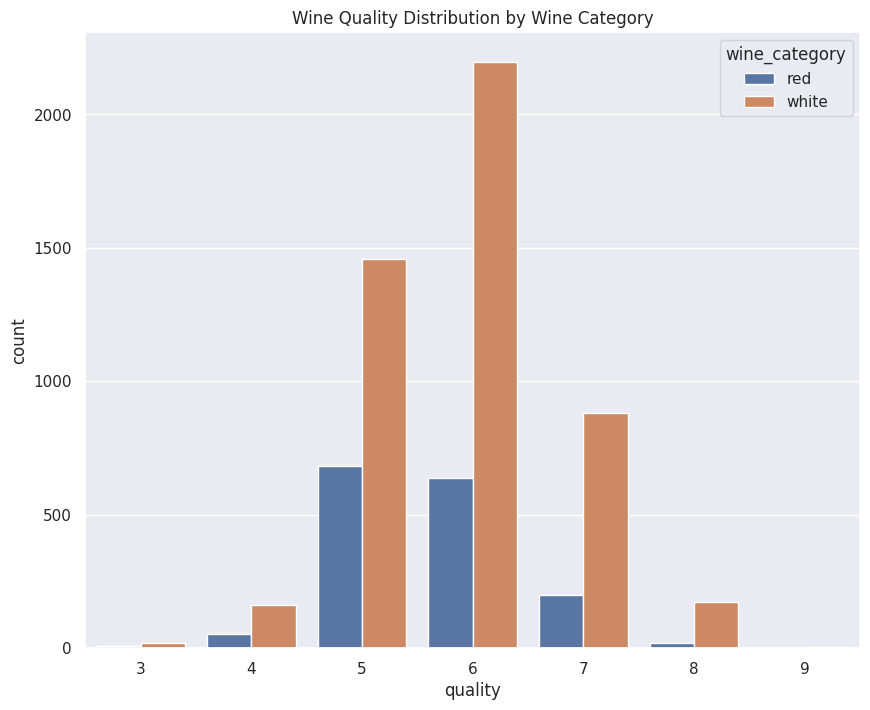

In [95]:
# Count plot for wine quality by category
plt.figure(figsize=(10, 8))
sns.countplot(data=df_wines, x="quality", hue="wine_category")
plt.title("Wine Quality Distribution by Wine Category")
plt.show()

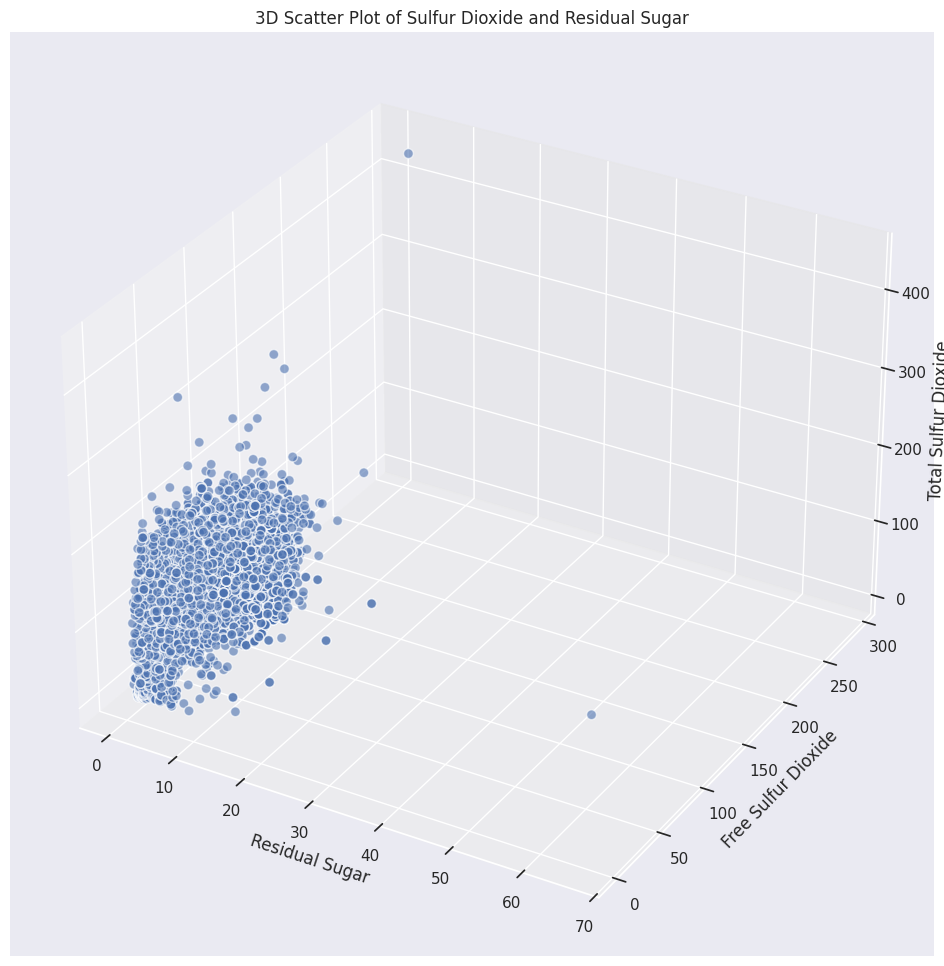

In [96]:
# 3D visualization of selected attributes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

xscale = df_wines['residual sugar']
yscale = df_wines['free sulfur dioxide']
zscale = df_wines['total sulfur dioxide']

ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Free Sulfur Dioxide')
ax.set_zlabel('Total Sulfur Dioxide')
plt.title("3D Scatter Plot of Sulfur Dioxide and Residual Sugar")
plt.show()

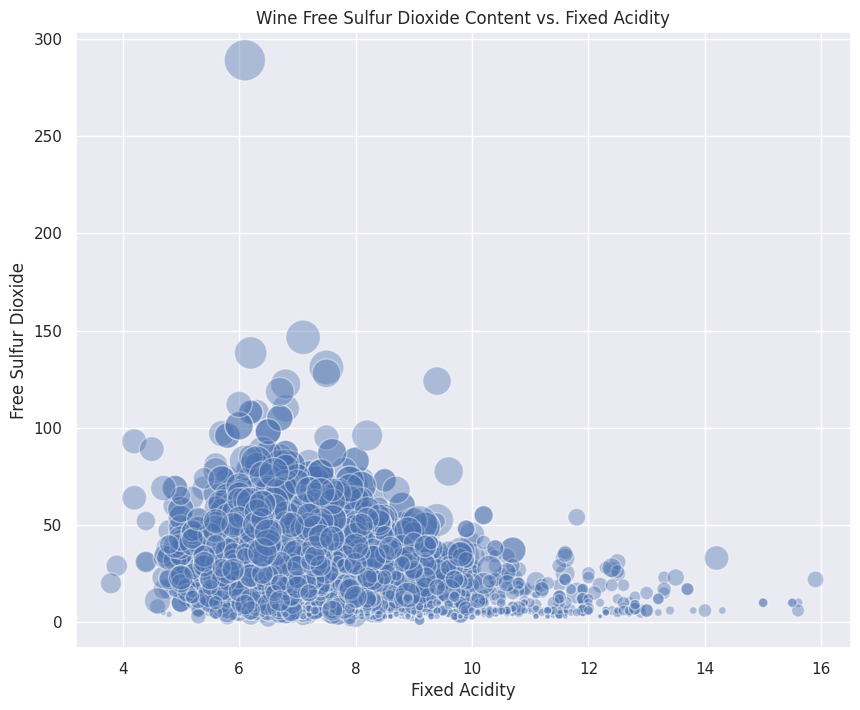

In [97]:
# Scatter plot for fixed acidity vs. free sulfur dioxide
plt.figure(figsize=(10, 8))
plt.scatter(x=df_wines['fixed acidity'], y=df_wines['free sulfur dioxide'],
            s=df_wines['total sulfur dioxide'] * 2, alpha=0.4, edgecolors='w')
plt.xlabel('Fixed Acidity')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Wine Free Sulfur Dioxide Content vs. Fixed Acidity')
plt.show()

#Cell 10: Classification Models for Wine Quality (Example)

          Modelling Algorithm  Accuracy
4      RandomForestClassifier  1.000000
5                DecisionTree  1.000000
6  GradientBoostingClassifier  1.000000
7                  GaussianNB  1.000000
1                   LinearSVM  0.984103
0          LogisticRegression  0.969744
3           KNearestNeighbors  0.691282
2                      rbfSVM  0.605128


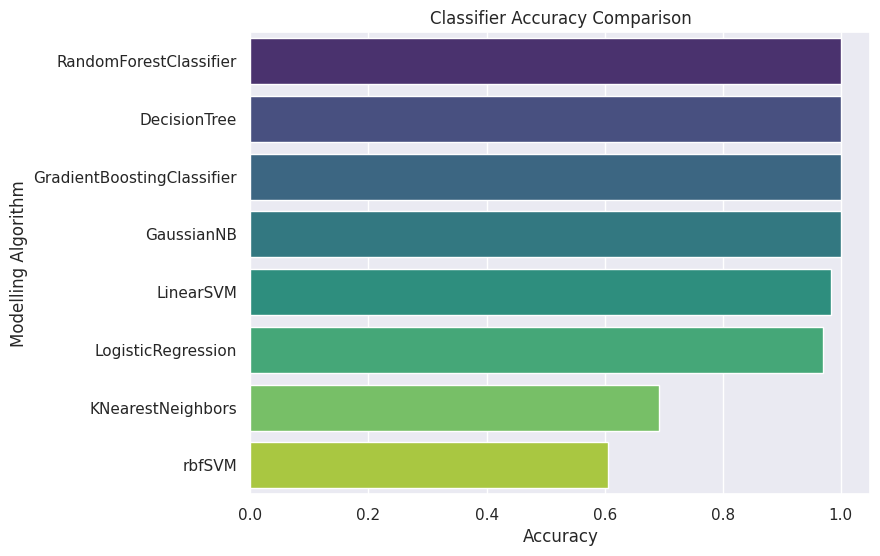

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming df_wines is already loaded
# Encode the quality labels
label_quality = LabelEncoder()
df_wines['quality_label'] = label_quality.fit_transform(df_wines['quality_label'])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    df_wines.drop(['quality', 'wine_category'], axis=1),
    df_wines['quality_label'],
    test_size=0.30,
    random_state=42
)

# List of classification models
models = [
    LogisticRegression(),
    LinearSVC(),
    SVC(kernel='rbf'),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()
]

model_names = [
    'LogisticRegression',
    'LinearSVM',
    'rbfSVM',
    'KNearestNeighbors',
    'RandomForestClassifier',
    'DecisionTree',
    'GradientBoostingClassifier',
    'GaussianNB'
]

acc = []
eval_acc = {}

for i, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc.append(accuracy_score(y_test, pred))

eval_acc = {'Modelling Algorithm': model_names, 'Accuracy': acc}
acc_table = pd.DataFrame(eval_acc).sort_values(by='Accuracy', ascending=False)
print(acc_table)

# Visualize model performance with custom color palette
plt.figure(figsize=(8, 6))
custom_palette = sns.color_palette("viridis", len(model_names))  # Example using 'viridis' palette
sns.barplot(y='Modelling Algorithm', x='Accuracy', data=acc_table, palette=custom_palette)
plt.title("Classifier Accuracy Comparison")
plt.show()

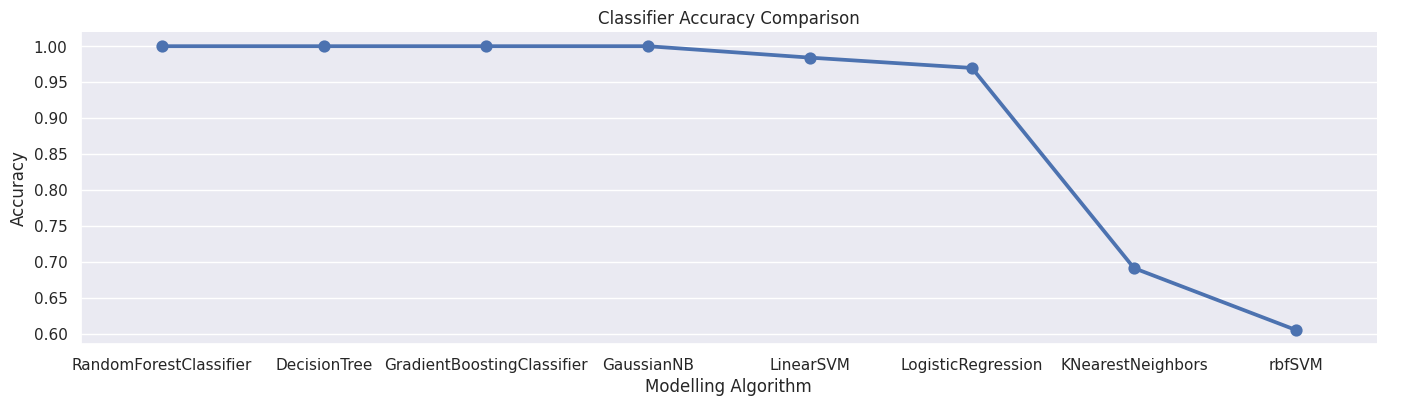

In [99]:
sns.catplot(x='Modelling Algorithm', y='Accuracy', data=acc_table, kind='point', height=4, aspect=3.5)
plt.title("Classifier Accuracy Comparison")
plt.show()